# Quantum Spectral Graph Analysis - Whitepaper #3

# Spectral Triviality of Skeleton Laplacians

Ohad Lev

September 2025

-------------

## (0) Imports

In [1]:
import numpy as np
from IPython.display import Math

from qsga.hamiltonian_generators import obtain_skeleton_laplacian
from qsga.util import compute_eigenspectrum_skeleton_laplacian
from qsga.data_verifiers import is_valid_laplacian
from qsga.graphics import obtain_math_text_hermitian_spectrum, sparse_pauli_op_to_latex

---

## (1) Analytical Formula For Skeleton Graphs' Spectrum

In **[Lov75]**, it is proven how to analytically obtain the adjacency spectrum for "cube-like" graphs, which Skeleton Graphs apparently are:

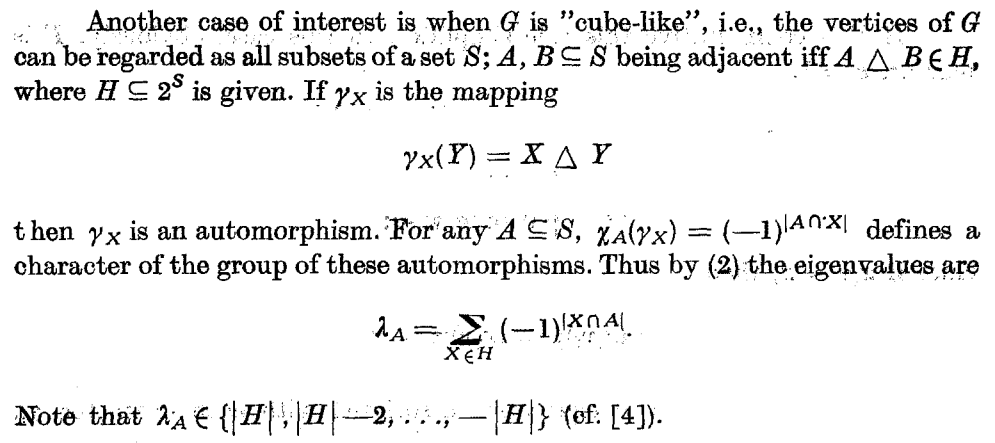

By transforming this equation to work with the Laplacian eigenspectrum and adopting our notation so far, we obtain:

$$
    \lambda(L, k) = d - \sum_{P \in S} (-1)^{m_k \cdot m_P}
    \quad \forall \ k = 1, \dots, |V|
    \tag{1}
$$

Where:

* $m_k$ is the binary representation of $k$.
* $k$ is an index variable that take integer values from $1$ to $|V|$.
* $S$ is the set of $IX$ operators that the Laplacian Hamiltonian is built from.
* $P$ is a a single $IX$ operator in $S$.
* $m_P$ is the *binary mask* of $P$, where $I \to 0$ and $X \to 1$. For example, $P = IXIX \implies m_P = 0101$.

Note that the order fo eigenvalues is not determined by $k$, as the next example shows.

---------

## (2) Experimentation

Let's try. We draw a random Skeleton Laplacian:

In [2]:
H = obtain_skeleton_laplacian(n=5, d=7)
Math("H = " + sparse_pauli_op_to_latex(H) + r"\tag{2}")

<IPython.core.display.Math object>

We compute its spectrum analitically, with **Equation (1)**:

In [3]:
H_spectrum = compute_eigenspectrum_skeleton_laplacian(H)
Math(obtain_math_text_hermitian_spectrum(eigvals=H_spectrum))

<IPython.core.display.Math object>

It can be seen that the result is not sorted. We obtain also a sorted spectrum:

In [4]:
H_spectrum_sorted = compute_eigenspectrum_skeleton_laplacian(H, sort=True)
Math(obtain_math_text_hermitian_spectrum(eigvals=H_spectrum_sorted))

<IPython.core.display.Math object>

And we compare this analytic result with a diagonalization result:

In [5]:
L = H.to_matrix()
L_eigendecomposition = np.linalg.eigh(L)
Math(obtain_math_text_hermitian_spectrum(eigh_result=L_eigendecomposition))

<IPython.core.display.Math object>

In [6]:
print(all(np.isclose(L_eigendecomposition.eigenvalues, H_spectrum_sorted)))
print(is_valid_laplacian(L))

True
The matrix is a valid (weighted) Laplacian matrix
True


We draw the corresponding graph:

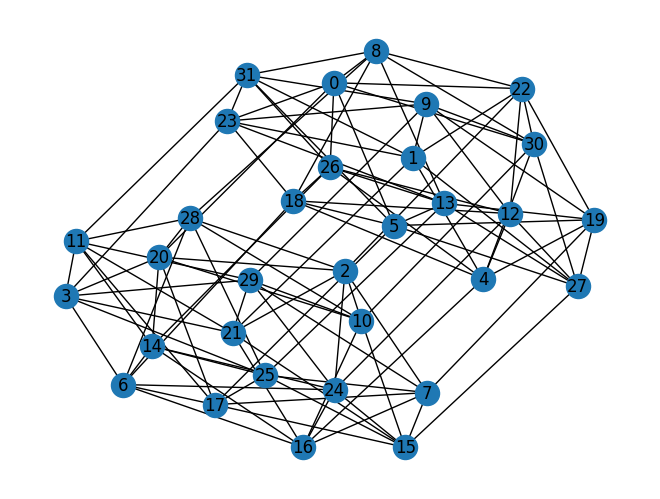

In [7]:
import networkx as nx
from qsga.util import decompose_laplacian_matrix

_, _, A = decompose_laplacian_matrix(np.real(L))

graph = nx.from_numpy_array(A)
nx.draw(graph, with_labels=True)

-----

## References

**[Lov75]** Lovász, László. "**Spectra of graphs with transitive groups.**" [Periodica Mathematica Hungarica 6.2 (1975): 191-195](https://link.springer.com/article/10.1007/BF02018821)